
#**Education Resource Management Strategies for Effective and Smart Budgeting**
----------------------------------------------------------------------------
CIS 545 - Big Data Analytics - Final Project - Fall 2020

**Authors: Jayanth Bhargav and Sadhana Ravoori**

University of Pennsylvania

<img src = "https://connectability.ca/wp-content/uploads/2020/09/back-to-school-backpack.jpg" width ="1000" height = "400">

## ***What do we intend to study in this project?***
Budgets for schools and school districts are huge, complex, and unwieldy. It's no easy task to digest where
and how schools are using their resources. We intend to study and analyze data to draw insights into various
categories of expenditures reported and analyze their effectiveness.

## ***What is the ultimate objective?***
Our ultimate task is to build a multi-class-multi-label classification model with the goal of attaching
canonical labels to the freeform text in budget line items. These labels let us understand how schools are
spending money and tailor their strategy recommendations to improve outcomes for students, teachers, and
administrators.

## ***More insight into the project...***

In order to compare budget or expenditure data across districts, **Education Resource Strategies (ERS)** assigns every line item to certain
categories in a comprehensive financial spending framework. This task of financial coding limits the ability
to provide in-depth analysis to the districts as the process is very time and labor-intensive. 

With the help of Machine Learning, we can code financial files and provide valuable insights to many more school districts
more accurately, quickly, and cost-effectively.
This project is interesting as it can influence the budgeting process of the school districts and in turn improve
the outcome for the students.
The project is interesting and challenging in context of the course because of two main reasons
1. More than 85% of the features are free-form text: Since most of the features are text, we will be
employing different techniques to transform this data into a representation that is more feasible for
drawing valuable insights.
2. It’s a multi-class multi-label classification problem: This is a challenging task as we will predict a
probability for each possible label. There is also a hierarchical relationship between the labels.




# **Exploratory Data Analysis**


## Import and Download all the packages

In [ ]:
# INSTALLS
%%capture
!pip install pandas-profiling==2.7.1

In [ ]:
# IMPORTS
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pandas_profiling
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import collections
import wordcloud
from collections import Counter
from collections import defaultdict 
nltk.download('punkt')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import string
from collections import Counter

from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading the Dataset
First, we find the size of the dataset. The dataset is available in a Amazon S3 bucket and we read it into a Pandas Dataframe.

In [ ]:
url = 'https://s3.amazonaws.com/drivendata/data/4/public/81e8f2de-9915-4934-b9ae-9705685c9d50.csv'
train_df = pd.read_csv(url, index_col='Unnamed: 0')
print("Dataframe size: ",train_df.shape)

Dataframe size:  (400277, 25)


The dataset has  <font color='blue'>**400,277**</font> rows\/ datapoints\/ expenditures and <font color='blue'>**25**</font> columns. There are <font color='blue'>**9**</font> target columns and <font color='blue'>**16**</font> feature columns.

<font color='black'>**Target Columns:**</font>

<font color='green'> **`Function`**, **`Object_Type`**, **`Operating_Status`**, **`Position_Type`**, **`Pre_K`**, **`Reporting`**, **`Sharing`**, **`Student_Type`**, **`Use`** </font>

<font color='black'>**Feature Columns:**</font>

<font color='purple'> **`FTE`**, **`Facility_or_Department`**,**`Function_Description`**, **`Fund_Description`**, **`Job_Title_Description`**, **`Location_Description`**, **`Object_Description`**, **`Position_Extra`**, **`Program_Description`** , **`SubFund_Description`** , **`Sub_Object_Description`** , **`Text_1`** , **`Text_2`** , **`Text_3`** , **`Text_4`** , **`Total`**  </font>

## Analysing the Target Columns
We have 9 target columns, each of them having multiple labels. Here we saw the distribution of our data with respect to these targets and labels. We found the number of uniques labels in each target column and the number of datapoints having those labels.

In [ ]:
labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 'Student_Type', 'Use']
train_X = train_df.drop(labels, axis=1)
train_y = train_df[labels]

def generateTargetInfo(df,label,disp):
  value_count = df[f'{label}'].value_counts()
  nuniques = df[f'{label}'].nunique()
  if disp:
    print("Label: ", label,"-------------------------" )
    print(value_count)
    print()
    print('Number of uniques: ', nuniques)

for l in labels:
  generateTargetInfo(train_y,l,True)

Label:  Function -------------------------
Teacher Compensation                               86354
Substitute Compensation                            62215
NO_LABEL                                           59579
Aides Compensation                                 19858
Instructional Materials & Supplies                 19711
Facilities & Maintenance                           19617
Professional Development                           19102
Student Transportation                             14371
Food Services                                      14203
School Administration                              13055
Enrichment                                         10686
Extended Time & Tutoring                            8375
Curriculum Development                              7603
Physical Health & Services                          5929
Social & Emotional                                  5003
Library & Media                                     4522
Special Population Program Management & Suppo

## Visualising the Target Columns and Labels
For each of the target column, we plot the number of data points/expenses recorded for each label in the column.

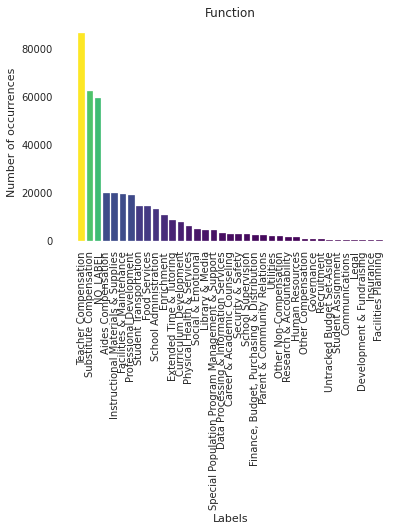

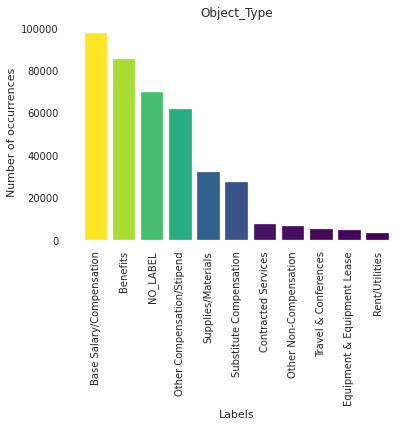

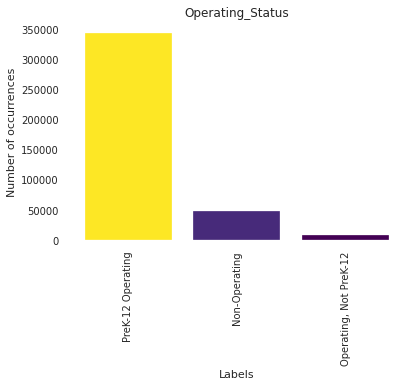

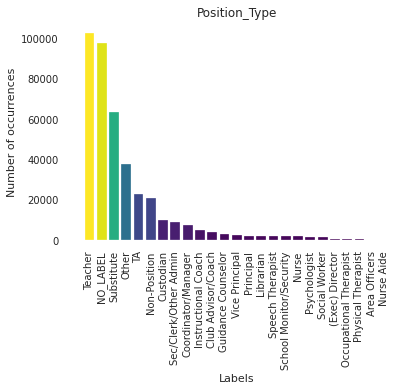

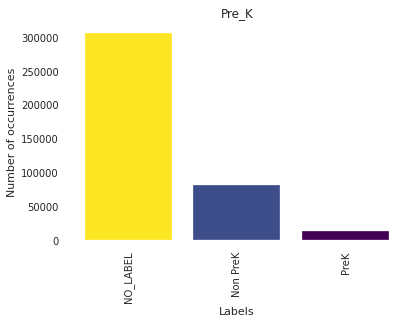

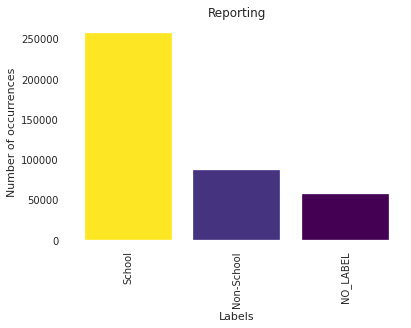

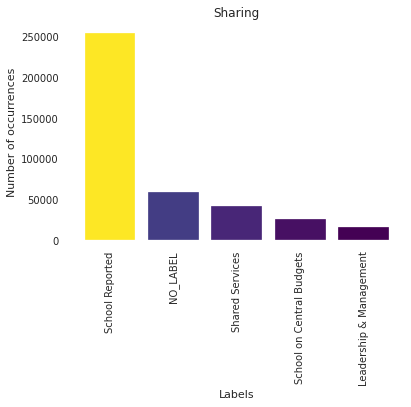

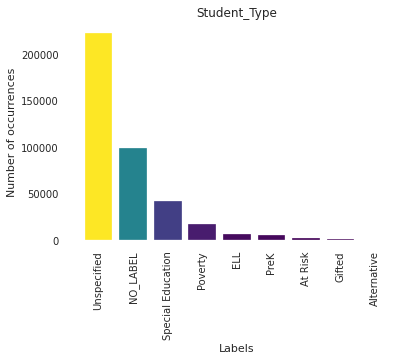

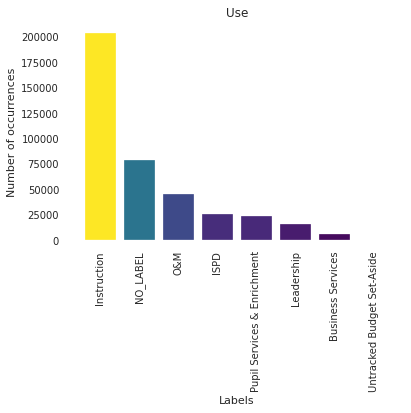

In [ ]:
# Generate Bar Plot
%matplotlib inline
labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 'Student_Type', 'Use']
for i in range(len(labels)):
  categories = train_y[labels[i]].value_counts()
  df = pd.DataFrame(categories)
  df.reset_index(inplace=True)
  x = df['index']
  y = df[f'{labels[i]}']

  #categories.plot(kind='bar')
  my_cmap = plt.get_cmap("viridis")
  rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

  fig = plt.bar(x, y, color=my_cmap(rescale(y)))

  # Label the axes
  plt.xlabel('Labels')
  plt.ylabel('Number of occurrences')
  plt.title(labels[i])
  plt.xticks(rotation=90)
  
  # Display the plot
  plt.show()

From this visualization, we can see the number of expenses recorded for each type of label in each target column.

 In the <font color='red'>**Use**</font> column, we can see that large number of expenses were recorded for  <font color='green'>**Instruction**</font> followed by <font color='green'>**0peration and Maintenance (O&M)**</font>. The number of expenses recorded for <font color='blue'>**Pupil Services & Enrichment**</font> and  <font color='blue'>**Leadership**</font> is relatively lesser.

 If we perform this analysis on the expenditure datasets of different schools, we can compare the distribution of their expenses across different labels in each target column.

## Textual Data Pre-Processing and Word Clouds
Since each of the data point/expense item has free-form text description, we tried to analyse the free-form text in the following columns: 


*   Function_Description
*   Program_Description
* Text_1

We performed the following pre-processing steps:



*   Removal of bad/unwanted patterns in the text (regex)
*   Tokenization, Lemmatization and Removal of Stop Words
* Counting the most frequent tokens in the description text and generating a word cloud














In [ ]:
# Free form text analysis
nltk.download('stopwords')
stopwords.words('english')
def remove_bad_patterns(text):
    text = re.sub("\n","", text)
    letters_only = re.sub("[^a-zA-Z]"," ",text)
    return letters_only

stopwords_list = set(stopwords.words('english')) 
def tokenizeContent(content):
  content = str(content)
  content = remove_bad_patterns(content)
  tokens = word_tokenize(content)
  new_tokens = []
  for t in tokens:
    t = str(t)
    if t.isalpha():
      new_tokens.append(t.lower())
  final_tokens = [x for x in new_tokens if x not in stopwords_list]
  return final_tokens

def generateTokens(df, column):
  col_list = df[f'{column}'].tolist()
  token_list = []
  for row in col_list:
    token_list.append(tokenizeContent(str(row)))

  final_list = []
  for subl in token_list:
    for item in subl:
      final_list.append(item)
  return final_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


World cloud for:  Function_Description


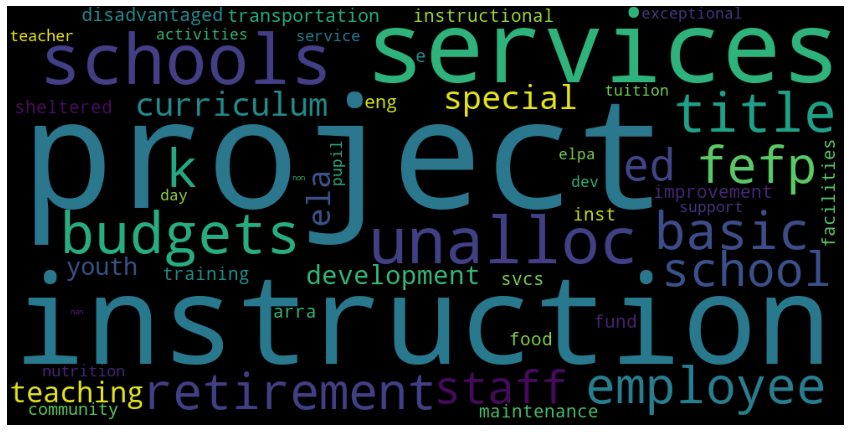

World cloud for:  Program_Description


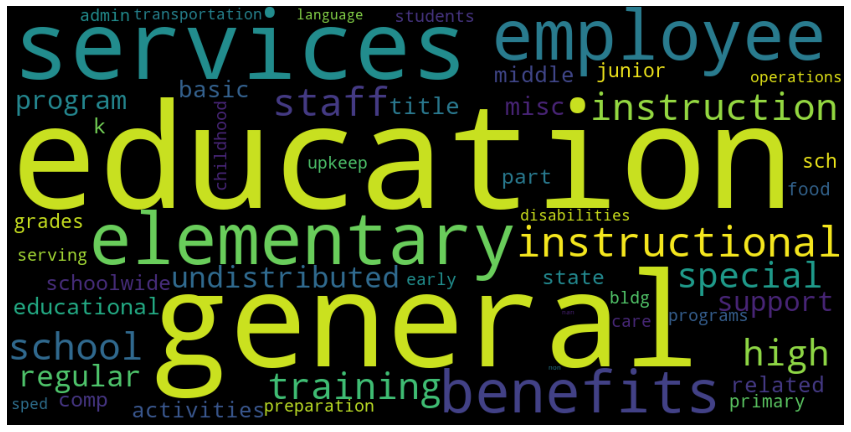

World cloud for:  Text_1


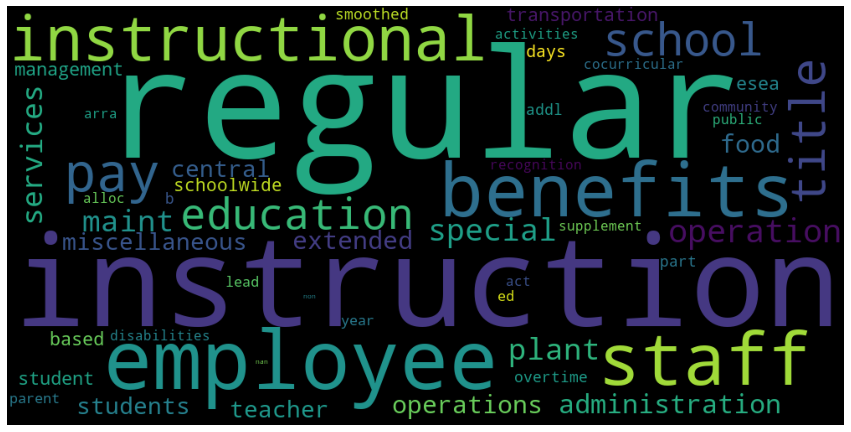

In [ ]:
def generateWordCloud(df,column):
  final_list = generateTokens(df, column)
  counter = collections.Counter(final_list)
  top_tokens = counter.most_common(50)

  top_list = []
  for item in top_tokens:
    top_list.append(item)

  word_could_dict= defaultdict(list)
  for i, j in top_list: 
      word_could_dict[i] = j 
  
  word_could_dict['nan'] = 1
  word_could_dict['non'] = 1
  highest_wordcloud = wordcloud.WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
  plt.figure(figsize=(15,8))
  plt.imshow(highest_wordcloud)
  plt.axis("off")
  plt.show()

text_cols = ['Function_Description', 'Program_Description', 'Text_1']
for col in text_cols:
  print("World cloud for: ", col)
  generateWordCloud(train_X,col)

From this visualization, we can see the number of expenses recorded for each type of label in each target column.

By generating the word clouds for <font color='red'>**Function_Description**</font>, <font color='red'>**Program_Description**</font> and <font color='red'>**Text_1**</font> columns, we can visualise the most common terms/words used in the description for the expenses. 

 If we perform this analysis on the expenditure datasets of different schools, we can compare how different are the descriptive explanations/ reasons given for expenditures in different schools. This gives us a sense of the most common reason for the expenditure.

 In the <font color='red'>**Function_Description**</font> column, the world cloud highlights the words: <font color='green'>**projects**</font>, <font color='green'>**services**</font>, <font color='green'>**instruction**</font>, <font color='green'>**curriculum**</font>. This will give us an insight that this school spends a lot of money on projects, instruction, services and curriculum.

## Generating Profiling Report

To get a deeper understanding into the complete dataset, we decided to generate an exhaustive profiling report of the dataset. We used Pandas Profiling to generate this report. 

In [ ]:
# Pandas Profiling Report
url = 'https://s3.amazonaws.com/drivendata/data/4/public/81e8f2de-9915-4934-b9ae-9705685c9d50.csv'
training = pd.read_csv(url, index_col='Unnamed: 0')
labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 
          'Student_Type', 'Use']

features = ['FTE', 'Facility_or_Department', 'Function_Description', 'Fund_Description', 
            'Job_Title_Description', 'Location_Description', 'Object_Description', 'Position_Extra', 
            'Program_Description', 'SubFund_Description', 'Sub_Object_Description', 'Text_1', 'Text_2', 
            'Text_3', 'Text_4', 'Total']
pandas_profiling.ProfileReport(training[features])

Pandas Profiling generated the following information:

* Type inference: detect the types of columns in a dataframe.

* Essentials: type, unique values, missing values

* Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range

* Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness

* Most frequent values

* Histograms

* Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices

* Missing values matrix, count, heatmap and dendrogram of missing values

* Duplicate rows Lists the most occurring duplicate rows

* Text analysis learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data

We use this information for feature selection and model building. This gives us an idea as to which of the columns will be good features for our model.

## Visualising the distribution of expenditure with respect to different target labels

Then we decided to get an insight into the distribution of the total expenditure across different target columns and their labels. 

For example, in the target column **"Student_Type"**, we want to analyse the total amount (of all expenses in USD) being spent on different types of students ( Special_Education, PreK, At Risk...) . 

We visualise this using horizontal bar plots in seaborn. To get this information, we wrote a SQL query in PandasSQL using GROUP BY and SUM() operations on the following target columns:

* Function
* Object_Type
* Position_Type
* Student_Type

In [ ]:
# Exploring total cost for each label in target columns using SQL Queries
%%capture
!pip install -U pandasql
import pandasql as ps

[]

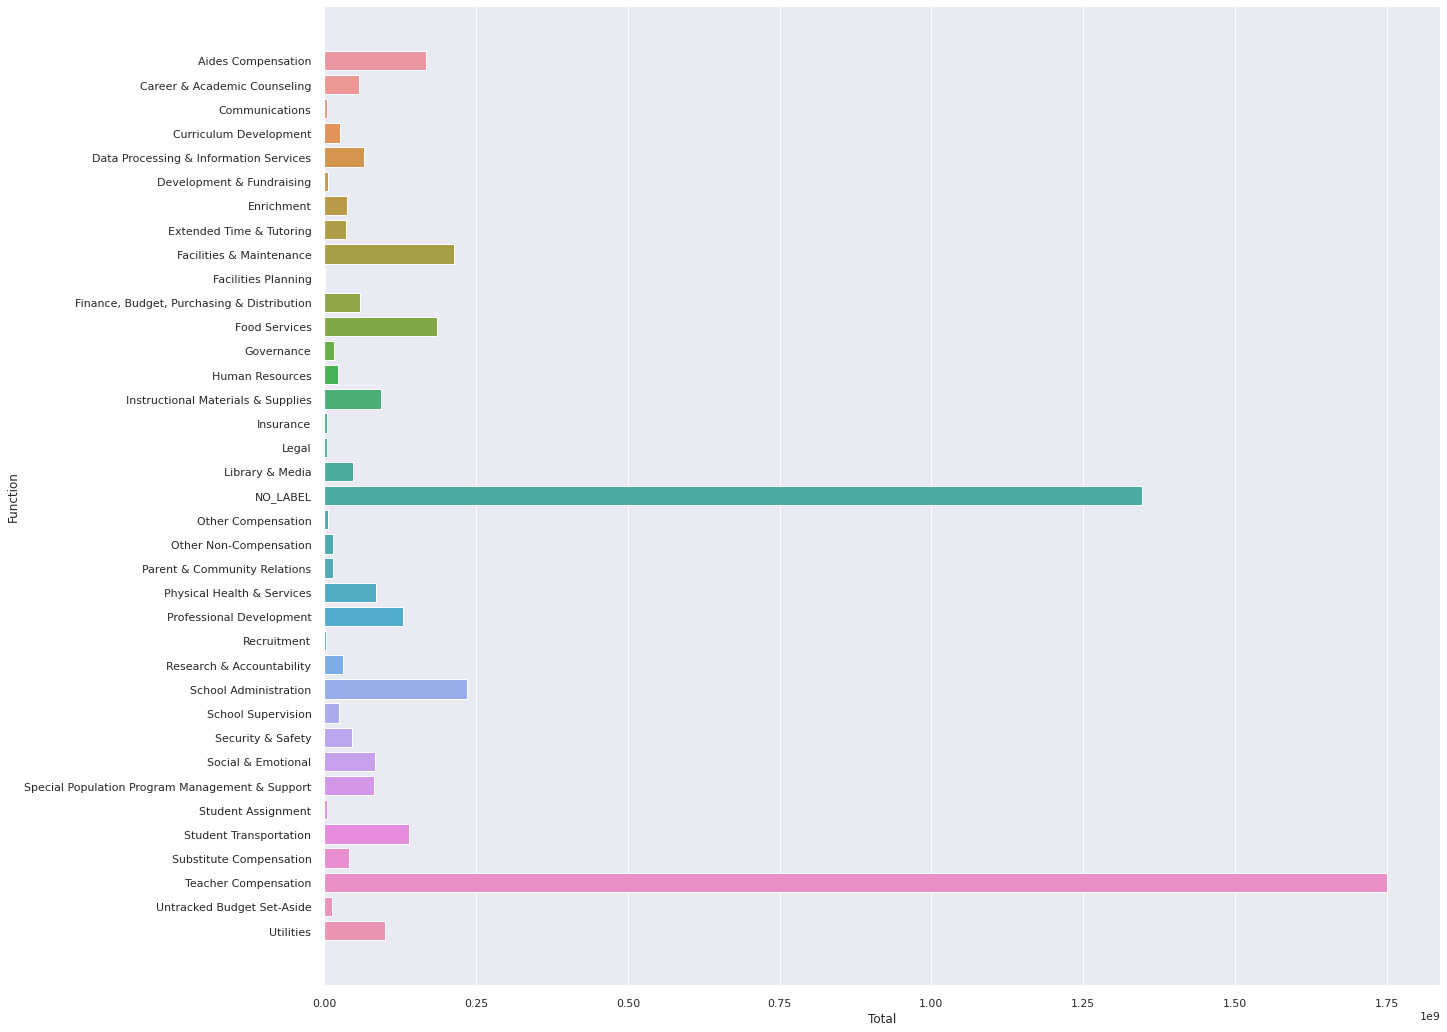

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
func_query = "SELECT Function,SUM(Total) as Total FROM training GROUP BY Function"
func_df = ps.sqldf(func_query, locals())
sns.set(rc={'figure.figsize':(20,18)})
ax1 = sns.barplot(x='Total', y='Function', data=func_df)
ax1.plot()

[]

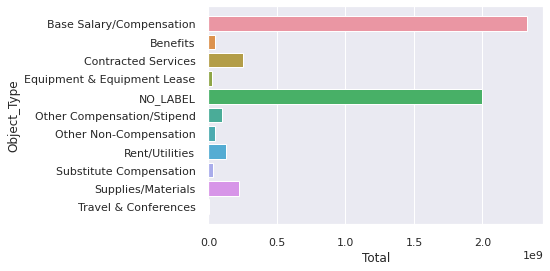

In [ ]:
obj_query = "SELECT Object_Type,SUM(Total) AS Total FROM training GROUP BY Object_Type"
obj_df = ps.sqldf(obj_query,locals())
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(6,4)})
ax2 = sns.barplot(x='Total', y='Object_Type', data=obj_df)
ax2.plot()

[]

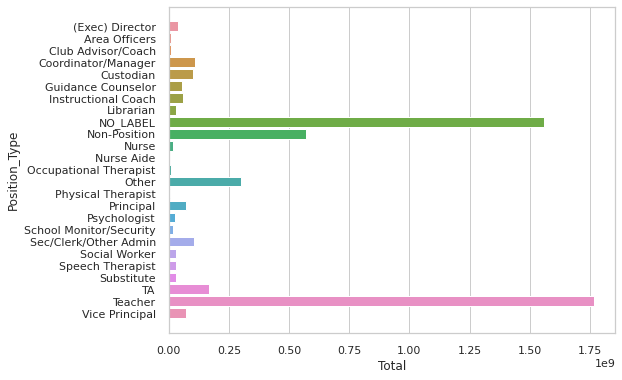

In [ ]:
pos_query = "SELECT Position_Type,SUM(Total) AS Total FROM training GROUP BY Position_Type"
obj_df = ps.sqldf(pos_query,locals())
sns.set_theme(style="whitegrid")
ax3 = sns.barplot(x='Total', y='Position_Type', data=obj_df)
sns.set(rc={'figure.figsize':(15,12)})
ax3.plot()

[]

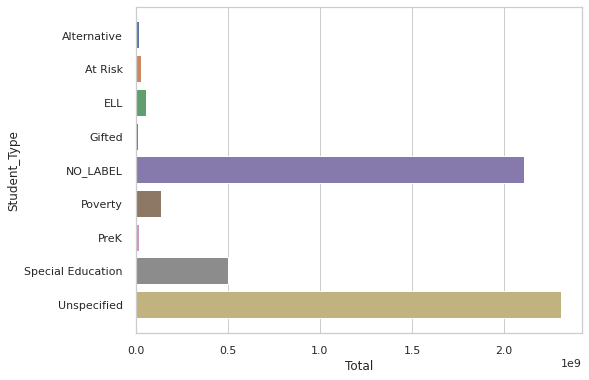

In [ ]:
stud_query = "SELECT Student_Type,SUM(Total) AS Total FROM training GROUP BY Student_Type"
stud_df = ps.sqldf(stud_query,locals())
sns.set_theme(style="whitegrid")
ax4 = sns.barplot(x='Total', y='Student_Type', data=stud_df)
sns.set(rc={'figure.figsize':(8,6)})
ax4.plot()

[]

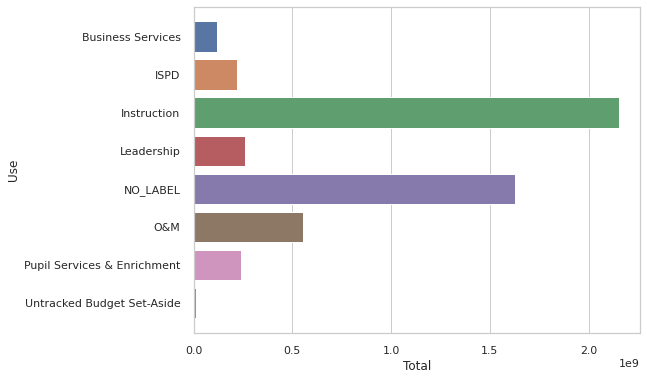

In [ ]:
stud_query = "SELECT Use,SUM(Total) AS Total FROM training GROUP BY Use"
stud_df = ps.sqldf(stud_query,locals())
sns.set_theme(style="whitegrid")
ax5 = sns.barplot(x='Total', y='Use', data=stud_df)
sns.set(rc={'figure.figsize':(8,6)})
ax5.plot()

From this visualization, we can see the total amount spent with respect to each type of label in each target column.


 If we perform this analysis on the expenditure datasets of different schools, we can compare how schools in different districts spend money on each type of service/function.

 In the <font color='red'>**Student_Type**</font> column, more money is being spent on <font color='purple'>**Special Education**</font> students compared to students which fall in the category of <font color='purple'>**Poverty**</font>. 

  In the <font color='red'>**Use**</font> column, more money is being spent on <font color='purple'>**Operation and Maintenance (O&M)**</font> compared to <font color='purple'>**Pupil Services & Enrichment**</font>. 

This visualization serves two purposes: 
 * This will give the school and insight into where exactly is their expendtiture going above a specified budget and they can plan better for the upcoming financial year. 
 * Knowing the total amount in USD being spent on different aspects of school operation & maintenance will help the school develop better strategies and re-organise the expenses in a more useful way

## Visualising the number of NAN values in the features

To get a deeper understanding and insight into the features and their usability for model building, we first decided to see the number of NAN values in each of the feature columns.

In [ ]:
# Exploring NAN's
import plotly.graph_objects as go
url = 'https://s3.amazonaws.com/drivendata/data/4/public/81e8f2de-9915-4934-b9ae-9705685c9d50.csv'
training = pd.read_csv(url, index_col='Unnamed: 0')
labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 
          'Student_Type', 'Use']

features = ['FTE', 'Facility_or_Department', 'Function_Description', 'Fund_Description', 
            'Job_Title_Description', 'Location_Description', 'Object_Description', 'Position_Extra', 
            'Program_Description', 'SubFund_Description', 'Sub_Object_Description', 'Text_1', 'Text_2', 
            'Text_3', 'Text_4', 'Total']

In [ ]:
from plotly.subplots import make_subplots
N = len(features)
total_rows = len(training)
num_of_nans = []
num_of_not_nan = []
specs = [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]
specx = [specs for i in range(4)]
fig = make_subplots(rows=4, cols=4, specs=specx)
xpos = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
ypos = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]
dictx = [0,0.25,0.5,0.75,0,0.25,0.5,0.75,0,0.25,0.5,0.75,0,0.25,0.5,0.75]
dicty = [0.25,0.5,0.75,0,0.25,0.5,0.75,0,0.25,0.5,0.75,0,0.25,0.5,0.75,0]
for k,col in enumerate(features):
    t_nans = training[f'{col}'].isna().sum()
    num_of_nans.append(t_nans)
    num_of_not_nan.append(total_rows - t_nans)

    labels = ['NAN', 'Not NAN']
    values = [t_nans/total_rows *100, (total_rows-t_nans)/total_rows * 100 ]
    fig.add_trace(go.Pie(labels=labels, values=values,pull=[0.2, 0],domain=dict(x=[dictx[k], dicty[k]]), title=col, 
                         titleposition="bottom center",textposition = "inside"),row=xpos[k], col=ypos[k])

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="White",
)
layout=dict(
autosize=True,
height = 1200,
width = 1200
)
fig.update_layout(layout)
fig.show()

These pie charts show the percentage of data which is NAN and not-NAN in ech of the feature columns. 

* If the percentage is very less, we can choose to keep those columns and drop the NAN's.
* If the percentage of NAN's is considerably high (around 33%), we can find a way of filling NAN's in some way.
* If the number of NAN's are too high (above 66%), we can choose to drop that column and proceed.

## Visualising the lengths of text description fields
There are three main fields that we identified, which containt free-form textual data that can help us in predicting the labels for the target columns.

We visualised the distribution of the text lengths of these feature columns. The three columns chosen for this visualisation are:

* Fund_Description
* Object_Description
* Text_1


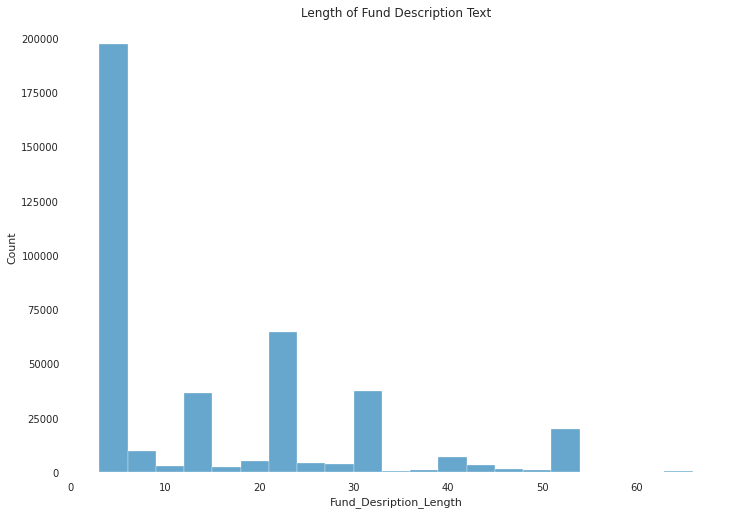

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
training['Fund_Desription_Length'] = training['Fund_Description'].astype(str).apply(len)
new_df = pd.DataFrame(training['Fund_Desription_Length'])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(data=new_df, x="Fund_Desription_Length",binwidth=3)
ax.set_title("Length of Fund Description Text")
plt.show()

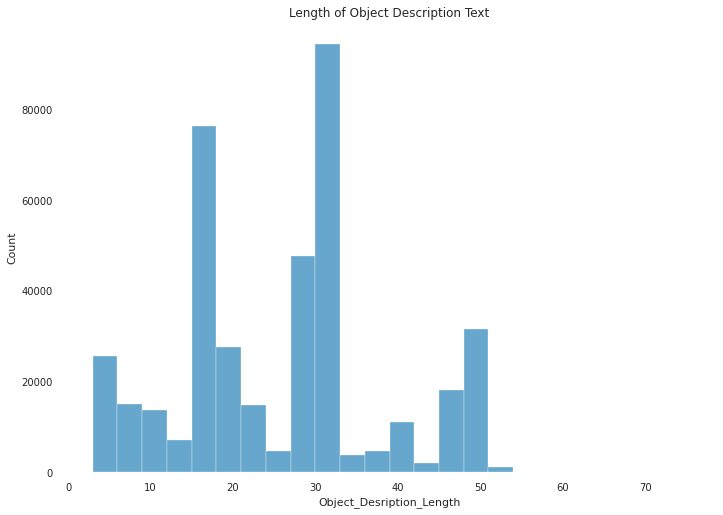

In [ ]:
training['Object_Desription_Length'] = training['Object_Description'].astype(str).apply(len)
new_df = pd.DataFrame(training['Object_Desription_Length'])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(data=new_df, x="Object_Desription_Length",binwidth=3)
ax.set_title("Length of Object Description Text")
plt.show()

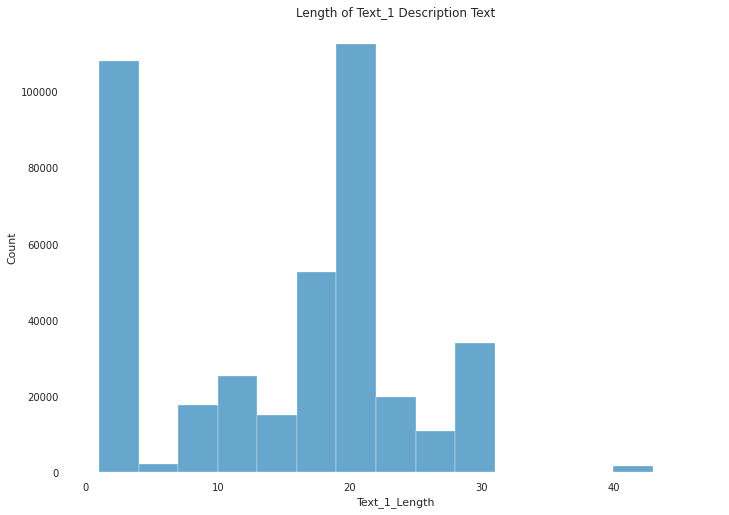

In [ ]:
training['Text_1_Length'] = training['Text_1'].astype(str).apply(len)
new_df = pd.DataFrame(training['Text_1_Length'])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(data=new_df, x="Text_1_Length",binwidth=3)
ax.set_title("Length of Text_1 Description Text")
plt.show()

As the features in our dataset are pre-dominantly free-form text and descriptive, we have to find a representation for this text suitable to build predictive models for label prediction. The most common representation of words for building machine learning models are word-embeddings. 

Each word is represented by a real-valued vector, often tens or hundreds of dimensions. This is contrasted to the thousands or millions of dimensions required for sparse word representations, such as a one-hot encoding.

We wanted to get a sense of how long are each of the descriptive sentences in the aforesaid columns as this would give us the intuition of the embedding space and its dimensions (sentence/word embedding space) which we will use to build models.

# **Machine Learning Models**

## Initializing Spark

In [ ]:
%%capture
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

In [ ]:
%%capture
!apt update
!apt install gcc python-dev libkrb5-dev

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('Project').getOrCreate()


In [ ]:
%load_ext sparkmagic.magics

In [ ]:
import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


In [ ]:
from pyspark.ml.classification import LogisticRegression, OneVsRest, NaiveBayes, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import HashingTF, IDF, Tokenizer


##Preparing the data for model building
Since most of the data is in textual, we need to transform them into features feasible for the ML model to be trained on. <br>
We will experiment with two different representations of the text. <br>
&nbsp;&nbsp;&nbsp;&nbsp; - Sparse representation <br>
&nbsp;&nbsp;&nbsp;&nbsp; - Tf-idf <br>



In [ ]:
url = 'https://s3.amazonaws.com/drivendata/data/4/public/81e8f2de-9915-4934-b9ae-9705685c9d50.csv'
train_df = pd.read_csv(url)


###1. Separating the features and target variables <br>
We create two dataframes, <br>
    - features (train_X): This dataframe contains all the raw features (16 features) <br>
    - targets (train_y): This dataframe contains all the raw target variables (9 target variables)


In [ ]:
features = ['FTE', 'Facility_or_Department', 'Function_Description', 'Fund_Description', 'Job_Title_Description', 'Location_Description', 'Object_Description', 'Position_Extra', 'Program_Description', 'SubFund_Description', 'Sub_Object_Description', 'Text_1', 'Text_2', 'Text_3', 'Text_4', 'Total']
labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 'Student_Type', 'Use']

In [ ]:
new_column_names = []
for col in train_df.columns:
    if col in features:
        new_column_names.append('feature_' + col)
    elif col in labels:
        new_column_names.append('target_' + col)
    else:
        new_column_names.append(col)

train_df.columns = new_column_names
del train_df['Unnamed: 0']
train_df.head()

target_Function  ...                 feature_Text_1
0     Teacher Compensation  ...                            NaN
1                 NO_LABEL  ...  BUILDING IMPROVEMENT SERVICES
2     Teacher Compensation  ...                            NaN
3  Substitute Compensation  ...            REGULAR INSTRUCTION
4  Substitute Compensation  ...            REGULAR INSTRUCTION

[5 rows x 25 columns]

### Data Preprocessing
At every step of the data preprocessing, we apply two different methods depending on the datatype of the feature. The dataset contains features of two different datatypes,
- String 
- Float

### Handling missing data
- String: Replace NaNs with an empty string
- Float: Replace NaNs with the mean of the feature

In [ ]:
text_features = [column for column in train_df.columns if column.startswith('feature_') and column not in ['feature_FTE', 'feature_Total']]
train_df[text_features] = train_df[text_features].fillna('')

In [ ]:
mean_of_FTE = train_df['feature_FTE'].mean()
train_df.feature_FTE = train_df['feature_FTE'].apply(lambda x : mean_of_FTE if pd.isna(x) else x)
assert train_df['feature_FTE'].isnull().sum() == 0 

In [ ]:
mean_of_Total = train_df['feature_Total'].mean()
train_df.feature_Total = train_df['feature_Total'].apply(lambda x : mean_of_Total if pd.isna(x) else x)
assert train_df['feature_Total'].isnull().sum() == 0 

In [ ]:
train_df.head()

target_Function  ...                 feature_Text_1
0     Teacher Compensation  ...                               
1                 NO_LABEL  ...  BUILDING IMPROVEMENT SERVICES
2     Teacher Compensation  ...                               
3  Substitute Compensation  ...            REGULAR INSTRUCTION
4  Substitute Compensation  ...            REGULAR INSTRUCTION

[5 rows x 25 columns]

### Text preprocessing <br>
1. Convert text to lowercase <br>
2. Remove punctuations <br>
3. Perform stemming and lemmatization of the text <br>


In [ ]:
def remove_punctuations(text):
    try:
        for punctuation in string.punctuation:
            text = text.replace(punctuation, '')
    except AttributeError:
        return text

    return text

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = PorterStemmer()

def stem_and_lemmatize_text(text):
    stemmed_text = [stemmer.stem(word) for word in word_tokenize(text)]
    lemmatized_text = [lemmatizer.lemmatize(word) for word in stemmed_text]

    return ' '.join(lemmatized_text)

In [ ]:
for column in train_df.columns:
    if column not in ['feature_FTE', 'feature_Total']:
        train_df[column] = train_df[column].str.lower()
        # train_df[column] = train_df[column].apply(stem_and_lemmatize_text)
        train_df[column] = train_df[column].apply(remove_punctuations)
        
        

###Feature Scaling
There are two numeric features in the dataset and we scale the features by using the Standard Scaler. 

In [ ]:
scaler = StandardScaler()

train_df[['feature_FTE', 'feature_Total']] = scaler.fit_transform(train_df[['feature_FTE', 'feature_Total']])
train_df.head()

target_Function  ...                 feature_Text_1
0     teacher compensation  ...                               
1                  nolabel  ...  building improvement services
2     teacher compensation  ...                               
3  substitute compensation  ...            regular instruction
4  substitute compensation  ...            regular instruction

[5 rows x 25 columns]

In [ ]:
train_X = train_df[[column_name for column_name in train_df.columns if 'feature' in column_name]]
train_y = train_df[[column_name for column_name in train_df.columns if 'target' in column_name]]
train_X.head(), train_y.head()

(     feature_Object_Description  ...                 feature_Text_1
 0                                ...                               
 1           contractor services  ...  building improvement services
 2   personal services  teachers  ...                               
 3             employee benefits  ...            regular instruction
 4  teacher coverage for teacher  ...            regular instruction
 
 [5 rows x 16 columns],
            target_Function   target_Use  ... target_Pre_K target_Operating_Status
 0     teacher compensation  instruction  ...      nolabel        prek12 operating
 1                  nolabel      nolabel  ...      nolabel            nonoperating
 2     teacher compensation  instruction  ...     non prek        prek12 operating
 3  substitute compensation  instruction  ...      nolabel        prek12 operating
 4  substitute compensation  instruction  ...      nolabel        prek12 operating
 
 [5 rows x 9 columns])

##Sparse Representation
1. Convert categorical variables into indicator variables <br>


> - We apply one-hot encoding and convert all categorial variables to indicator variables. <br>
- In doing so, the number of target variables blow up from 5 target variables to 90 labels. <br>
- Before creating the indicator variables, we split the features dataset based on the type of columns. A dataframe with float columns and another dataframe with textual data.
- Since most of the features are free form text, creating indicator variables from the features results in more than 8000 features.




2. Create a sparse matrix of the features

3. Split the data into train, test and dev sets


In [ ]:
train_X = train_df[[column_name for column_name in train_df.columns if 'feature' in column_name]]
train_y = train_df[[column_name for column_name in train_df.columns if 'target' in column_name]]
train_y = train_y.drop(['target_Sharing', 'target_Reporting', 'target_Pre_K', 'target_Operating_Status'], axis = 1)


In [ ]:
train_X_text = train_X.drop(['feature_FTE', 'feature_Total'], axis=1)
train_X_float = train_X[['feature_FTE', 'feature_Total']]

In [ ]:
for column in train_X_text.columns:
    
    value_count = train_X_text[column].value_counts()
    nuniques = train_X_text[column].nunique()
    print('-'*80)
    print(column, " Unique descriptions: ", nuniques)
    print('-'*80)
    print(value_count)


--------------------------------------------------------------------------------
feature_Object_Description  Unique descriptions:  592
--------------------------------------------------------------------------------
employee benefits                 47495
salaries of part time employee    31761
                                  24784
salaries of regular employees     24319
contra benefits                   19381
                                  ...  
when actually employed  wae           1
internet access service               1
non term full time                    1
operating transfers out               1
student transp  parents               1
Name: feature_Object_Description, Length: 592, dtype: int64
--------------------------------------------------------------------------------
feature_Text_2  Unique descriptions:  284
--------------------------------------------------------------------------------
                             312060
teacher subs                  16599
food ser

In [ ]:
train_X_text = pd.get_dummies(train_X_text, sparse=True)
train_X_text.head()

feature_Object_Description_  ...  feature_Text_1_zoone oh environ
0                            1  ...                                0
1                            0  ...                                0
2                            0  ...                                0
3                            0  ...                                0
4                            0  ...                                0

[5 rows x 8732 columns]

In [ ]:
train_X_text_sparse_matrix = csr_matrix(train_X_text)
train_X_sparse_matrix = hstack([train_X_text_sparse_matrix, train_X_float])
train_X_sparse_matrix

<400277x8734 sparse matrix of type '<class 'numpy.float64'>'
	with 6404432 stored elements in COOrdinate format>

In [ ]:
train_y = pd.get_dummies(train_y, sparse=True)
train_y.head()

target_Function_aides compensation  ...  target_Object_Type_travel  conferences
0                                   0  ...                                       0
1                                   0  ...                                       0
2                                   0  ...                                       0
3                                   0  ...                                       0
4                                   0  ...                                       0

[5 rows x 90 columns]

In [ ]:
X_train_sparse, X_val_sparse, y_train_sparse, y_val_sparse = train_test_split(train_X_sparse_matrix, train_y, test_size = 0.2)
X_test_sparse, X_val_sparse, y_test_sparse, y_val_sparse = train_test_split(X_val_sparse, y_val_sparse, test_size = 0.5)


In [ ]:
print('X_train : ', X_train_sparse.shape)
print('y_train : ', y_train_sparse.shape)
print('*' * 25)
print('X_test : ', X_test_sparse.shape)
print('y_test : ', y_test_sparse.shape)
print('*' * 25)
print('X_val : ', X_val_sparse.shape)
print('y_val : ', y_val_sparse.shape)

X_train :  (320221, 8734)
y_train :  (320221, 90)
*************************
X_test :  (40028, 8734)
y_test :  (40028, 90)
*************************
X_val :  (40028, 8734)
y_val :  (40028, 90)


##3. TF-IDF Representation

In [ ]:
train_X = train_df[[column_name for column_name in train_df.columns if 'feature' in column_name]]
train_y = train_df[[column_name for column_name in train_df.columns if 'target' in column_name]]
train_y = train_y.drop(['target_Sharing', 'target_Reporting', 'target_Pre_K', 'target_Operating_Status'], axis = 1)


In [ ]:
train_X_text = train_X.drop(['feature_FTE', 'feature_Total'], axis=1)
features = pd.Series(train_X_text.values.tolist()).str.join(' ')
train_X_text = pd.DataFrame({'text': features})
train_X_text.head()

text
0     teacherelementary        kindergarten  kind...
1  contractor services bond expenditures building...
2  personal services  teachers   tcher 2nd grade ...
3  employee benefits teacher subs general fund te...
4  teacher coverage for teacher teacher subs gene...

In [ ]:
train_X_text.memory_usage()

Index        128
text     3202216
dtype: int64

In [ ]:
def encode_labels(target_variable):
    le = LabelEncoder()
    return le.fit_transform(target_variable)

for column in train_y.columns:
    train_y[column] = encode_labels(train_y[column])

train_y.head()

target_Function  target_Use  ...  target_Position_Type  target_Object_Type
0               34           1  ...                    23                   4
1               18           4  ...                     8                   4
2               34           1  ...                    23                   0
3               33           1  ...                    21                   1
4               33           1  ...                    23                   8

[5 rows x 5 columns]

In [ ]:
final_train_df = pd.concat([train_y, train_X_float, train_X_text], axis = 1)

In [ ]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400277 entries, 0 to 400276
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   target_Function       400277 non-null  int64  
 1   target_Use            400277 non-null  int64  
 2   target_Student_Type   400277 non-null  int64  
 3   target_Position_Type  400277 non-null  int64  
 4   target_Object_Type    400277 non-null  int64  
 5   feature_FTE           400277 non-null  float64
 6   feature_Total         400277 non-null  float64
 7   text                  400277 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 24.4+ MB


In [ ]:
train, val = train_test_split(final_train_df, test_size = 0.2)
val, test = train_test_split(val, test_size = 0.5)

In [ ]:
len(train), len(val), len(test)

(320221, 40028, 40028)

In [ ]:
schema = StructType([
                    StructField("target_Function", IntegerType(), nullable=False),
                    StructField("target_Use", IntegerType(), nullable=False),
                    StructField("target_Student_Type", IntegerType(), nullable=False),
                    StructField("target_Position_Type", IntegerType(), nullable=False),
                    StructField("target_Object_Type", IntegerType(), nullable=False),
                    StructField("feature_FTE", FloatType(), nullable=False),
                    StructField("feature_Total", FloatType(), nullable=False),
                    StructField("text", StringType(), nullable=False),
])

In [ ]:
train_sdf = spark.createDataFrame(train, schema=schema)
train_sdf.show()

+---------------+----------+-------------------+--------------------+------------------+-------------+-------------+--------------------+
|target_Function|target_Use|target_Student_Type|target_Position_Type|target_Object_Type|  feature_FTE|feature_Total|                text|
+---------------+----------+-------------------+--------------------+------------------+-------------+-------------+--------------------+
|             25|         3|                  8|                   8|                10|-6.760054E-14| -0.035697997|incounty travel  ...|
|             23|         2|                  8|                   6|                 5|-6.760054E-14| -0.034002233|additionalextra d...|
|             34|         1|                  7|                  23|                 0|    1.6416261|   0.16241115|classroom teacher...|
|             33|         1|                  5|                  21|                 5|-6.760054E-14|  -0.03545753|additionalextra d...|
|             23|         2|      

In [ ]:
val_sdf = spark.createDataFrame(val, schema=schema)
val_sdf.show()

+---------------+----------+-------------------+--------------------+------------------+-------------+-------------+--------------------+
|target_Function|target_Use|target_Student_Type|target_Position_Type|target_Object_Type|  feature_FTE|feature_Total|                text|
+---------------+----------+-------------------+--------------------+------------------+-------------+-------------+--------------------+
|             18|         4|                  4|                   8|                 4|-6.760054E-14|  -0.03712787|other pupil trans...|
|             23|         2|                  8|                  23|                 5|-6.760054E-14| -0.035665426|additionalextra d...|
|              0|         1|                  2|                  22|                 1|-6.760054E-14| -0.027577957|employee benefits...|
|             34|         1|                  7|                  23|                 0|   -1.1922077| -0.029550068|salaries of regul...|
|             25|         3|      

In [ ]:
test_sdf = spark.createDataFrame(test, schema=schema)
test_sdf.show()

+---------------+----------+-------------------+--------------------+------------------+-------------+--------------+--------------------+
|target_Function|target_Use|target_Student_Type|target_Position_Type|target_Object_Type|  feature_FTE| feature_Total|                text|
+---------------+----------+-------------------+--------------------+------------------+-------------+--------------+--------------------+
|              0|         1|                  4|                  22|                 4|    1.7807157|   0.069433734|   instructional ...|
|             33|         1|                  8|                  21|                 0|     -1.30899|  -0.035498567|salaries of part ...|
|              7|         1|                  8|                  23|                 5|-6.760054E-14|   -0.03526682|salaries and wage...|
|             18|         4|                  4|                   8|                 4|-6.760054E-14|  -0.046997674|certificated meet...|
|             28|         4

In [ ]:
tokenizer = Tokenizer(inputCol="text", outputCol="words")
train_wordsData = tokenizer.transform(train_sdf)
val_wordsData = tokenizer.transform(val_sdf)
test_wordsData = tokenizer.transform(test_sdf)

print(train_wordsData.show(5))
print(val_wordsData.show(5))
print(test_wordsData.show(5))
print('----------------tokenization done--------------------')

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures")
train_featurizedData = hashingTF.transform(train_wordsData)
val_featurizedData = hashingTF.transform(val_wordsData)
test_featurizedData = hashingTF.transform(test_wordsData)

print(train_featurizedData.show(5))
print(val_featurizedData.show(5))
print(test_featurizedData.show(5))
print('----------------tf done--------------------')

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(train_featurizedData)

train_sdf = idfModel.transform(train_featurizedData)
val_sdf = idfModel.transform(val_featurizedData)
test_sdf = idfModel.transform(test_featurizedData)
print('----------------FINAL--------------------')


print(train_sdf.show())
print(val_sdf.show())
print(test_sdf.show())

+---------------+----------+-------------------+--------------------+------------------+-------------+-------------+--------------------+--------------------+
|target_Function|target_Use|target_Student_Type|target_Position_Type|target_Object_Type|  feature_FTE|feature_Total|                text|               words|
+---------------+----------+-------------------+--------------------+------------------+-------------+-------------+--------------------+--------------------+
|             25|         3|                  8|                   8|                10|-6.760054E-14| -0.035697997|incounty travel  ...|[incounty, travel...|
|             23|         2|                  8|                   6|                 5|-6.760054E-14| -0.034002233|additionalextra d...|[additionalextra,...|
|             34|         1|                  7|                  23|                 0|    1.6416261|   0.16241115|classroom teacher...|[classroom, teach...|
|             33|         1|                  

##Experiments

In this section, we explore different machine learning models and train it on the two different representations of the input features.
We also conduct experiments with building multi-class classifiers and one-vs-rest binary classifiers. <br>
We demonstrate the final results later on in the conclusion section.


###1. One-vs-rest Logistic Regression classifier
The first machine learning model that we train is a logistic regression model using the sparse representation of the features. There are more than 8000 features in this sparse matrix where each feature is formed from by considering all input features as categorical features. <br>

- Input = Sparse Matrix Feature representation
- Output = Label 0 or 1 for target variable
- Task = One-vs-rest classification for all target variables 
- Model = Logistic Regression
- Hyper-parameters tuned = solver

This experiment leads to building 90 logistic regression models which predict 0 or 1 for the 90 target variables. <br>
We use sklearn for this experiment.


In [ ]:
from sklearn.linear_model import LogisticRegression

results = {}

for solver in ['saga', 'sag', 'liblinear', 'lbfgs']:
    lr = OneVsRestClassifier(LogisticRegression(solver=solver))
    lr.fit(X_train_sparse, y_train_sparse)
    val_acc = lr.score(X_val_sparse, y_val_sparse)
    print("Solver:", solver, "Mean Accuracy on the validation data with solver: ", val_acc)
    results[solver] = val_acc

Solver: saga Mean Accuracy on the validation data with solver:  0.5427700609573298
Solver: sag Mean Accuracy on the validation data with solver:  0.6182047566703308
Solver: liblinear Mean Accuracy on the validation data with solver:  0.9006945138403117
Solver: lbfgs Mean Accuracy on the validation data with solver:  0.9121614869591286


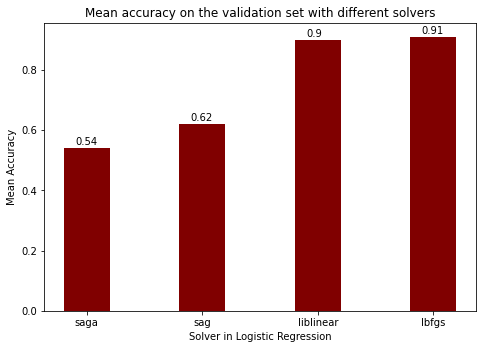

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

solvers = ['saga', 'sag', 'liblinear', 'lbfgs']
acc = []
for solver in solvers:
    acc.append(results[solver])

plt.bar(solvers, acc, color ='maroon',   width = 0.4)

for i, v in enumerate(acc):
    plt.text(i-0.1, v + 0.01, str(v))

plt.title("Mean accuracy on the validation set with different solvers")
plt.xlabel("Solver in Logistic Regression")
plt.ylabel("Mean Accuracy")
plt.show()


Performance of the model on the test set

In [ ]:
test_acc = lr.score(X_test_sparse, y_test_sparse)

print("Final mean accuracy of the best model on the test set", test_acc)

Final mean accuracy of the best model on the test set 0.9184570800439692


###2. One-vs-rest Logistic Regression classifier
The next machine learning model that we train is also a logistic regression model but using the tf-idf representation of the features.  <br>

- Input = TF-IDF Feature representation
- Output = Label 0 or 1 for target variable
- Task = One-vs-rest classification for all target variables 
- Model = Logistic Regression

This experiment leads to building 90 logistic regression models which predict 0 or 1 for the 90 target variables. <br>
We run this experiment using Spark.


In [ ]:
from pyspark.ml.classification import LogisticRegression, OneVsRest

result = {}

for label in ['target_Function', 'target_Use', 'target_Student_Type', 'target_Position_Type', 'target_Object_Type']:
    lr = LogisticRegression(featuresCol='features', labelCol=label)
    one_vs_all = OneVsRest(classifier=lr, featuresCol='features', labelCol=label)
    
    evaluator = MulticlassClassificationEvaluator(metricName="accuracy", labelCol=label)

    model = one_vs_all.fit(train_sdf)

    predictions = model.transform(test_sdf)
    accuracy = evaluator.evaluate(predictions)

    result[label] = accuracy

    print("Predicting target variable: ", label, "Accuracy =", accuracy)


Predicting target variable:  target_Function Accuracy = 0.21519936044768662
Predicting target variable:  target_Use Accuracy = 0.5044968522034575
Predicting target variable:  target_Student_Type Accuracy = 0.5536124712701109
Predicting target variable:  target_Position_Type Accuracy = 0.3664934545817927
Predicting target variable:  target_Object_Type Accuracy = 0.43606975117417807



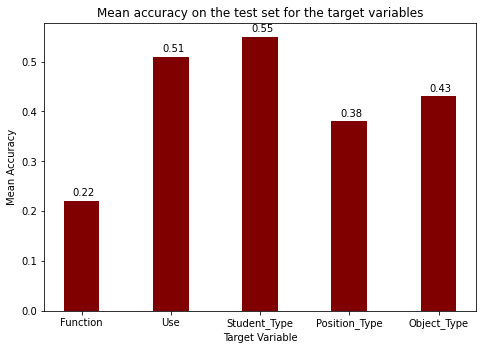

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

labels = ['Function', 'Use', 'Student_Type', 'Position_Type', 'Object_Type']
acc = []
for label in labels:
    acc.append(results[label])

plt.bar(labels, acc, color ='maroon',   width = 0.4)

for i, v in enumerate(acc):
    plt.text(i-0.1, v + 0.01, str(v))

plt.title("Mean accuracy on the test set for the target variables")
plt.xlabel("Target Variable")
plt.ylabel("Mean Accuracy")
plt.show()


Performance of the model on the test set

In [ ]:
print("Final mean accuracy on the test set = ", sum(list(result.values()))/len(result))

Final mean accuracy on the test set =  0.4151743779354452


###3. Multi-class Naive Bayes classifier
The next machine learning algorithm that we explore is Naive Bayes.  <br>

- Input = TF-IDF Feature representation
- Output = Label c&isin; target variable, number of possible classes for target variable >= 5
- Task = Multi-class classification for the 5 target variables 
- Model = Naive Bayes

This experiment leads to building 5 multi-class Naive Nayes models which predict a label for the 5 target variables. <br>
We use Spark for this experiment.


In [ ]:
from pyspark.ml.classification import NaiveBayes

result = {}

for label in ['target_Use','target_Position_Type','target_Object_Type', 'target_Function', 'target_Student_Type', ]:
    nb = NaiveBayes(smoothing=1.0, modelType="multinomial", featuresCol='features', labelCol=label)

    model = nb.fit(train_sdf)
    predictions = model.transform(test_sdf)

    evaluator = MulticlassClassificationEvaluator(labelCol=label, metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    result[label] = accuracy

    print("Predicting target variable: ", label, "Accuracy =", accuracy)



Predicting target variable:  target_Use Accuracy = 0.8840311781752773
Predicting target variable:  target_Position_Type Accuracy = 0.9132607174977516
Predicting target variable:  target_Object_Type Accuracy = 0.9159588288198262
Predicting target variable:  target_Function Accuracy = 0.8670430698511042
Predicting target variable:  target_Student_Type Accuracy = 0.9153342660137903


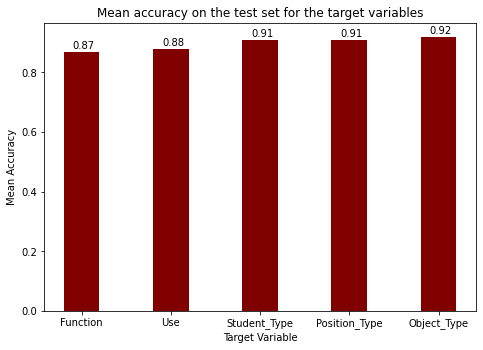

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

labels = ['Function', 'Use', 'Student_Type', 'Position_Type', 'Object_Type']
acc = []
for label in labels:
    acc.append(results[label])

plt.bar(labels, acc, color ='maroon',   width = 0.4)

for i, v in enumerate(acc):
    plt.text(i-0.1, v + 0.01, str(v))

plt.title("Mean accuracy on the test set for the target variables")
plt.xlabel("Target Variable")
plt.ylabel("Mean Accuracy")
plt.show()


Performance of the model on the test set

In [ ]:
print("Final mean accuracy on the test set = ", sum(list(result.values()))/len(result))

Final mean accuracy on the test set =  0.89912561207155


# **Conclusion**
Our goal was to derive insights from the expenditure dataset of schools, which can help them in make better decisions and strategies for resource management. We also wanted to develop models which can generate labels to catgorize the expenditures into various target categories and labels.





## Outcomes of EDA

The Exploratory Data Analysis part of our project focussed on analysing the expenses answer the following questions, which might be useful for the school administration:

* Which is the distribution of expenses with respect to Position_Type (Principal / Teacher / Librarian / Coordinator / Manager) ? Which category hs the highest number of expenses recorded ?
* What are the most common words present in the description of the expenditure ? What are the most common phrases occuring in the textual descriptions given for the expenditure ?
* With respect to Student_Type, how much total money (of all expenses in USD) is being spent on different types of students ( Special_Education, PreK, At Risk...)
* How long are the textual descriptions ? What is the distribution of the text lengths of the expenditure descriptions ? Are they too long or too short?

## Outcomes of Machine Learning Models

In the next part of our project, our focus was on building Machine Learning models to predict the label of a particular target column. The goal of this model building is to reduce the task of manually tagging the expenditure data with the labels. By building accurate models, we can assign the labels to new expenditure items using their features with high confidence. 

**We decided to explore Logistic Regression and Naive Bayes algorithms as they naturally give the probability of the labels.**

**Using this probability, we can decide if we can trust the predictions of the model. We find that Naive Bayes along with a simple text representation of tf-idf can yield performance greater than 85% accuracy.**



## Course Components

We would like to highlight the various concepts of CIS 545 (Big Data Analytics) and the various python packages we used for this project:

* **Pandas** - Data Cleaning and Dataframe analysis
* **PandasSQL** - Efficiently Computing over Data
* **NLTK** - Text Processing and Information Extraction
* **Matplotlib, Plotly and Seaborn** - Visualizations  (Bar Graphs, Histograms, Pie Charts)
* **Pandas Profiling** -  Profiling Big Data
* **Spark** - Cloud and Cluster Data Processing, Big Data and the Cloud